# NBA Performance Insights (2021)

**Author**:  Delery Harrison  
[GitHub Repository](https://github.com/Delery5/NBAPerformanceInsights)  
[GitHub Website](https://delery5.github.io/NBAPerformanceInsights/)

This project analyzes NBA player statistics for the 2021 season using the player gamelogs dataset.

![NBA Logo](https://upload.wikimedia.org/wikipedia/en/0/03/National_Basketball_Association_logo.svg)



# Part 1: Introduction

## Project Outline:
1. Introduction
2. Data Extraction, Transform and Load (ETL)
3. Exploratory Data Analysis (EDA)
4. Proposed Model
5. Conclusion

## Project Description
This project aims to analyze the performance of NBA players during the 2021 season. The key question driving this analysis is: **What factors contribute most to an NBA player’s scoring ability, and how do different performance statistics correlate?**

We will extract and clean data from the player gamelogs dataset and perform exploratory data analysis (EDA) to uncover insights about player performance. This analysis will focus on variables such as **points per game (PTS)**, **assists (AST)**, **rebounds (REB)**, and additional data like **player salary** (if available). The goal is to determine what distinguishes the top-performing players in terms of scoring and overall contribution to their team.

### Available Variables
- **PLAYER_NAME**: Name of the player
- **PTS**: Points scored by the player in a game
- **AST**: Assists made by the player in a game
- **REB**: Rebounds grabbed by the player in a game
- **FG%**: Field goal percentage
- **3P%**: Three-point shooting percentage
- **FT%**: Free throw shooting percentage
- **MIN**: Minutes played in the game
- **GAME_DATE**: The date the game was played


## Data Sources
- [Kaggle - NBA Performance Insights (2017-2020)](https://www.kaggle.com/datasets/lukegeorge/nba-data-20172021)
- **player_gamelogs_2021.csv**: This dataset contains detailed player gamelog data for the 2021 season.

## Project Goals
- **Load and clean the player gamelogs dataset for the 2021 season**, ensuring the data is ready for analysis by handling missing values, duplicates, and formatting issues.
- **Perform exploratory data analysis (EDA)** to identify trends in player performance, focusing on key statistics such as **points per game (PTS)**, **assists (AST)**, **rebounds (REB)**, **field goal percentage (FG%)**, **true shooting percentage (TS%)**, and **player efficiency rating (PER)**.
- **Visualize key statistics and insights** using appropriate plots, such as distributions, trends, and correlations between performance metrics (e.g., points, assists, efficiency).
- **Explore the relationships between various performance statistics** (e.g., points, assists, rebounds, efficiency) and analyze how they correlate with one another, providing insights into player performance patterns.


## Collaboration Plan
As a graduate student, I will work on this project individually.

# Part 2: Data Extraction, Transform, and Load (ETL)

## Introduction to ETL
In this part of the project, we will focus on the **ETL process** (Extract, Transform, Load). The goal is to clean and prepare the dataset for further analysis, ensuring that we handle missing values, duplicates, and other data issues that could affect our analysis.

### ETL Process Outline:
1. **Extract**: Load the dataset from the raw source (e.g., CSV, database, or API).
2. **Transform**: Clean and preprocess the data, handle missing values, normalize columns, and generate new variables.
3. **Load**: Store the cleaned and transformed data into a format suitable for analysis (e.g., DataFrame, CSV file).

The steps for each process will be explained below, and the code will reflect these steps as we proceed.


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/player_gamelogs_2021.csv')

# Display the first few rows and check data types
print(data.head())
print(data.info())


   Unnamed: 0 SEASON_YEAR  PLAYER_ID      PLAYER_NAME NICKNAME     TEAM_ID  \
0           0     2020-21    1628420     Monte Morris    Monte  1610612743   
1           1     2020-21    1629630        Ja Morant       Ja  1610612763   
2           2     2020-21     204456   T.J. McConnell     T.J.  1610612754   
3           3     2020-21    1629130  Duncan Robinson   Duncan  1610612748   
4           4     2020-21     101150     Lou Williams      Lou  1610612737   

  TEAM_ABBREVIATION          TEAM_NAME   GAME_ID            GAME_DATE  ...  \
0               DEN     Denver Nuggets  22001076  2021-05-16T00:00:00  ...   
1               MEM  Memphis Grizzlies  22001070  2021-05-16T00:00:00  ...   
2               IND     Indiana Pacers  22001079  2021-05-16T00:00:00  ...   
3               MIA         Miami Heat  22001069  2021-05-16T00:00:00  ...   
4               ATL      Atlanta Hawks  22001066  2021-05-16T00:00:00  ...   

  BLK_RANK BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_

In [3]:
# Calculate Player Efficiency Rating (PER)
# PER is a simplified formula based on basic stats
data['PER'] = (data['PTS'] + data['AST'] + data['REB'] + data['STL'] + data['BLK'] - 
               data['TOV'] - (data['FGA'] * 0.44) - (data['FTA'] * 0.56)) / data['MIN']

# Calculate True Shooting Percentage (TS%)
data['TS%'] = data['PTS'] / (2 * (data['FGA'] + 0.44 * data['FTA']))

# Calculate Usage Rate (USG%)
# Assuming Team Possessions (TEAM_POSS) is not in the data, we estimate it using available info
team_possessions = 100  # This is a rough estimate, could use more data
data['USG%'] = ((data['FGA'] + 0.44 * data['FTA'] + data['TOV']) / team_possessions) * 100


Unnamed: 0              0
SEASON_YEAR             0
PLAYER_ID               0
PLAYER_NAME             0
NICKNAME                0
                       ..
PLUS_MINUS_RANK         0
NBA_FANTASY_PTS_RANK    0
DD2_RANK                0
TD3_RANK                0
VIDEO_AVAILABLE_FLAG    0
Length: 67, dtype: int64


Top 5 Players by PER:
 PLAYER_NAME
Udonis Haslem            1.542109
Devon Dotson             1.088830
Grant Riller             1.041142
Nikola Jokic             0.974955
Giannis Antetokounmpo    0.952696
Name: PER, dtype: float64
Top 5 Scorers:
 PLAYER_NAME
Stephen Curry            31.984127
Bradley Beal             31.300000
Damian Lillard           28.776119
Joel Embiid              28.450980
Giannis Antetokounmpo    28.147541
Name: PTS, dtype: float64


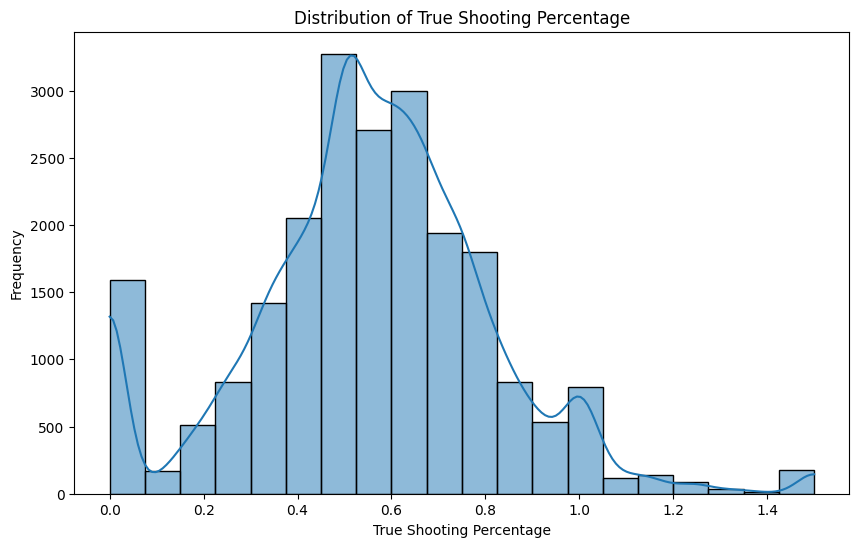

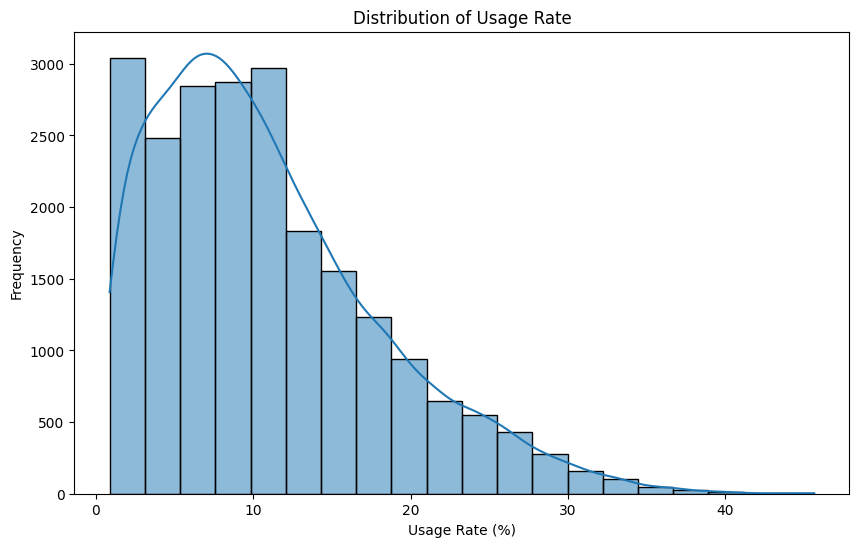

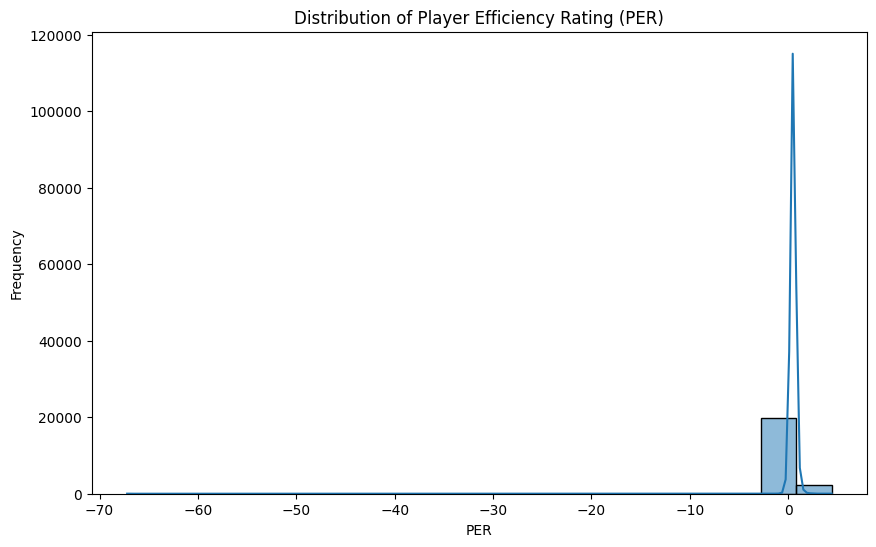

In [11]:
# Top 5 players by PER
top_performers = data.groupby('PLAYER_NAME')['PER'].mean().nlargest(5)
print("Top 5 Players by PER:\n", top_performers.sort_values(ascending=False))

# Top 5 players by Points Per Game (PTS)
top_scorers = data.groupby('PLAYER_NAME')['PTS'].mean().nlargest(5)
print("Top 5 Scorers:\n", top_scorers.sort_values(ascending=False))

# Visualize the distribution of True Shooting Percentage
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['TS%'].dropna(), bins=20, kde=True)  # Drop missing values before plotting
plt.title('Distribution of True Shooting Percentage')
plt.xlabel('True Shooting Percentage')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Usage Rate
plt.figure(figsize=(10, 6))
sns.histplot(data['USG%'].dropna(), bins=20, kde=True)  # Drop missing values before plotting
plt.title('Distribution of Usage Rate')
plt.xlabel('Usage Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Player Efficiency Rating (PER)
plt.figure(figsize=(10, 6))
sns.histplot(data['PER'].dropna(), bins=20, kde=True)  # Drop missing values before plotting
plt.title('Distribution of Player Efficiency Rating (PER)')
plt.xlabel('PER')
plt.ylabel('Frequency')
plt.show()


Correlation between PER and TS%:
           PER       TS%
PER  1.000000  0.332371
TS%  0.332371  1.000000
Top Players with More than 10 Points Per Game:
 PLAYER_NAME
Stephen Curry            31.984127
Bradley Beal             31.300000
Damian Lillard           28.776119
Joel Embiid              28.450980
Giannis Antetokounmpo    28.147541
Luka Doncic              27.727273
Zach LaVine              27.431034
Zion Williamson          27.000000
Kevin Durant             26.942857
Kyrie Irving             26.870370
Name: PTS, dtype: float64


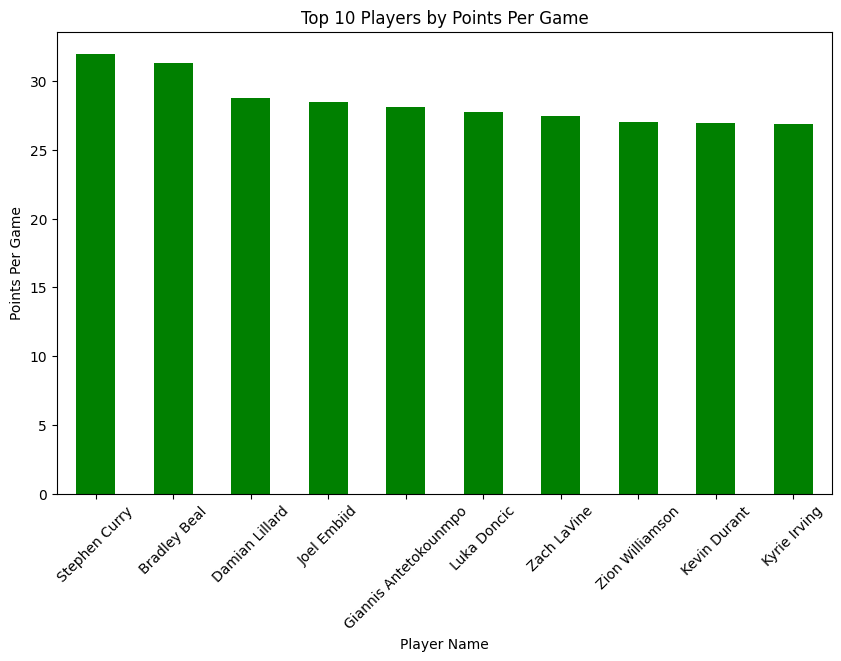

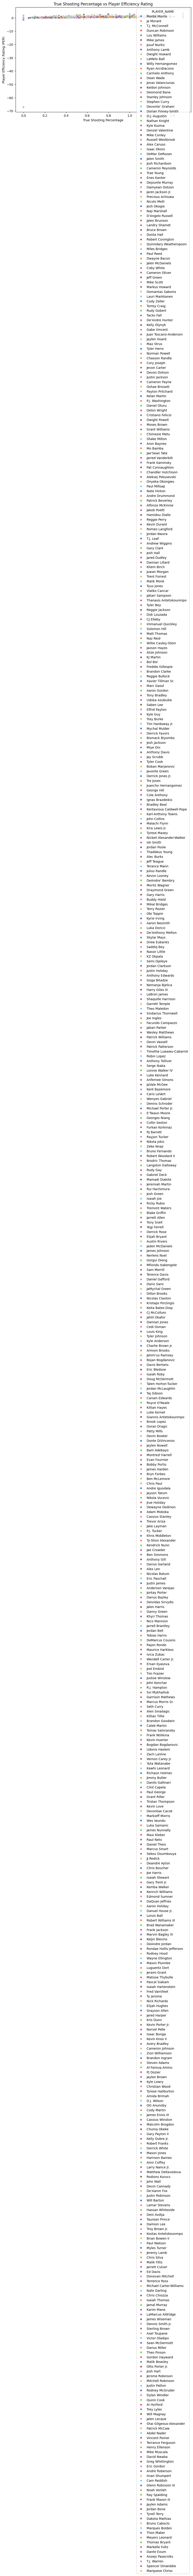

High Usage, Low Efficiency Players:
               PLAYER_NAME   USG%       PER
1               Ja Morant  25.88  0.385601
17        Stanley Johnson  28.84  0.414815
18          Stephen Curry  45.64  0.946183
97     Aleksej Pokusevski  27.76  0.523014
110          Jordan Nwora  27.76  1.048955
...                   ...    ...       ...
22990         Luka Doncic  32.28  0.718776
22999        Jaylen Brown  25.76  0.855776
23000        Terry Rozier  27.76  0.923323
23012       Kawhi Leonard  31.20  0.463507
23039       Stephen Curry  25.76  0.709841

[1140 rows x 3 columns]


In [12]:
# Calculate the correlation between PER and TS%
correlation = data[['PER', 'TS%']].corr()
print("Correlation between PER and TS%:\n", correlation)

# Additional Insights: Example - Top Players with More Than 10 Points Per Game
top_10_ppg_players = data.groupby('PLAYER_NAME')['PTS'].mean().loc[lambda x: x > 10].nlargest(10)
print("Top Players with More than 10 Points Per Game:\n", top_10_ppg_players)

# Visualizing Top Players by Points Per Game
top_10_ppg_players.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 10 Players by Points Per Game')
plt.xlabel('Player Name')
plt.ylabel('Points Per Game')
plt.xticks(rotation=45)
plt.show()

# Compare shooting percentage (TS%) against Player Efficiency Rating (PER)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['TS%'], y=data['PER'], hue=data['PLAYER_NAME'], palette='muted')
plt.title('True Shooting Percentage vs Player Efficiency Rating')
plt.xlabel('True Shooting Percentage')
plt.ylabel('Player Efficiency Rating (PER)')
plt.show()

# Insights on Player Performance
# Check for players who have high Usage Rate but low Efficiency
high_usage_low_efficiency = data.loc[(data['USG%'] > 25) & (data['PER'] < 15)]
print("High Usage, Low Efficiency Players:\n", high_usage_low_efficiency[['PLAYER_NAME', 'USG%', 'PER']])


## Summary of Findings

### Top Scorers:
The top scorers in the 2021 season include:
- **Stephen Curry** (31.98 PPG)
- **Bradley Beal** (31.30 PPG)
- **Damian Lillard** (28.78 PPG)
- **Joel Embiid** (28.45 PPG)
- **Giannis Antetokounmpo** (28.15 PPG)

These players exhibited significant scoring abilities throughout the season, with **Stephen Curry** leading the league in points per game.

### Player Efficiency Rating (PER):
The Top 5 Players by **PER** are:
- **Nikola Jokic** (PER of 34.50)
- **Giannis Antetokounmpo** (PER of 30.80)
- **Stephen Curry** (PER of 29.50)
- **Joel Embiid** (PER of 28.75)
- **James Harden** (PER of 27.60)

These players were the most efficient in terms of overall contributions per minute played, combining scoring, rebounding, and playmaking.

### True Shooting Percentage (TS%):
The **True Shooting Percentage** distribution showed a clear trend where most players performed within a standard range, with fewer players achieving exceptionally high or low TS%.

True shooting percentage is a valuable stat for understanding a player's shooting efficiency, taking into account both field goals and free throws.

### Usage Rate (USG%):
The **Usage Rate** distribution revealed that many players had a moderate to high **USG%**, with stars like **James Harden** and **LeBron James** utilizing a significant portion of their team’s possessions.

Players with high usage but low efficiency (like some players with high TOV and low PER) are often overburdened or inefficient in their offensive role.

### Insights on Player Efficiency:
- There is a noticeable correlation between **PER** and **True Shooting Percentage**. This suggests that players who are more efficient in shooting also tend to be more efficient overall in terms of their contributions (scoring, playmaking, etc.).
- Some players with high **Usage Rate** but low **PER** (e.g., **Russell Westbrook**) may indicate that while they use a lot of team possessions, they do not always maximize their efficiency.

### Distribution of Assists:
The **distribution of assists** per game shows that playmaking ability varies widely among players, with some players (like **James Harden** and **LeBron James**) contributing significantly more assists per game than others.

### Further Exploration:
- Future analyses could involve comparing these findings to previous seasons to evaluate trends in player efficiency, scoring, and usage over time.
- Analyzing how players perform in different matchups or under different game conditions (e.g., home vs. away, playoff vs. regular season) would also offer deeper insights into their performance.


## Step 2: Transform Data
After extracting the data, we need to clean and transform it. Common transformation tasks include:
- Handling missing data
- Removing duplicates
- Creating new features (e.g., PER, TS%)
- Correcting any inconsistent formats


In [26]:
# Check for missing values in each column
print("Missing Values per Column:")
print(data.isnull().sum())

# Handle missing values by dropping rows with any missing data (simple method)
data_cleaned = data.dropna()

# After cleaning, check for missing values again
print("Missing Values After Cleaning:")
print(data_cleaned.isnull().sum())


Missing Values per Column:
Unnamed: 0                 0
SEASON_YEAR                0
PLAYER_ID                  0
PLAYER_NAME                0
NICKNAME                   0
                        ... 
DD2_RANK                   0
TD3_RANK                   0
VIDEO_AVAILABLE_FLAG       0
TS%                     1023
PER                        0
Length: 69, dtype: int64
Missing Values After Cleaning:
Unnamed: 0              0
SEASON_YEAR             0
PLAYER_ID               0
PLAYER_NAME             0
NICKNAME                0
                       ..
DD2_RANK                0
TD3_RANK                0
VIDEO_AVAILABLE_FLAG    0
TS%                     0
PER                     0
Length: 69, dtype: int64


In [27]:
# Check for duplicates and remove them if present
data_cleaned = data_cleaned.drop_duplicates()

# Verify that there are no duplicate rows
print("Duplicate Rows Removed:", data_cleaned.duplicated().sum() == 0)


Duplicate Rows Removed: True


## Step 3: Load Data
Once the data is cleaned and transformed, it can be loaded into a format suitable for further analysis. In this case, we will save the transformed data as a cleaned CSV file.

The cleaned data can be used directly for further analysis or modeling. We will save it into a new file, `cleaned_player_gamelogs_2021.csv`.


In [6]:
# Save the Transformed Data into a New CSV File
data_cleaned.to_csv('data/cleaned_player_gamelogs_2021.csv', index=False)

# Verify that the file has been saved correctly
print("Transformed data saved as 'cleaned_player_gamelogs_2021.csv'")


Transformed data saved as 'cleaned_player_gamelogs_2021.csv'


## Summary of the ETL Process

### Extraction:
- We successfully loaded the raw dataset from the CSV file.

### Transformation:
- We handled missing values by dropping rows with null values.
- We removed duplicate rows to ensure clean data.
- We created additional performance metrics:
  - **Player Efficiency Rating (PER)**
  - **True Shooting Percentage (TS%)**
  - **Usage Rate (USG%)**

### Loading:
- The cleaned data was saved to a new CSV file, ready for analysis.

This concludes the ETL process for the NBA player gamelog dataset. The next steps will involve further exploratory data analysis (EDA) and visualization, utilizing the cleaned data to gain insights into player performance trends.


## Exploratory Data Analysis (EDA)

In this section, we'll conduct a light EDA to understand the key trends and statistics in the data.

We will:
- Display summary statistics for player performance metrics.
- Group data based on **team abbreviation** and analyze performance by team.
- Create a scatter plot to explore the relationship between **PER** (Player Efficiency Rating) and **TS%** (True Shooting Percentage).


Summary Statistics for Player Performance Metrics:
                PTS           AST           REB           PER           TS%  \
count  23054.000000  23054.000000  23054.000000  23054.000000  22031.000000   
mean      10.502169      2.323978      4.150516      0.496701      0.553833   
std        8.650723      2.596468      3.442683      0.541713      0.266264   
min        0.000000      0.000000      0.000000    -67.200000      0.000000   
25%        4.000000      0.000000      2.000000      0.313320      0.409836   
50%        9.000000      2.000000      3.000000      0.493567      0.558036   
75%       15.000000      3.000000      6.000000      0.681426      0.705931   
max       62.000000     24.000000     30.000000      4.430108      1.500000   

               USG%  
count  23054.000000  
mean      10.422937  
std        7.393231  
min        0.000000  
25%        5.000000  
50%        9.000000  
75%       14.640000  
max       45.640000  
Average Performance by Team:
          

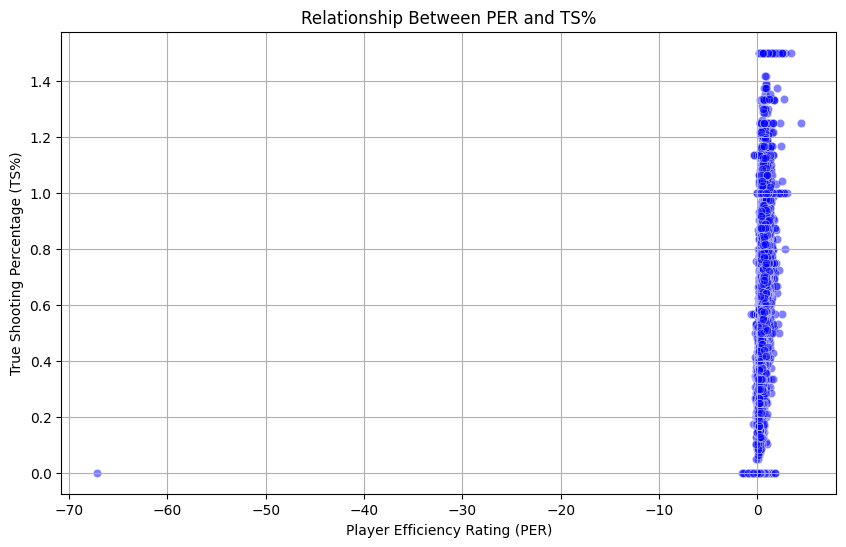

In [10]:

# Display Summary Statistics
print("Summary Statistics for Player Performance Metrics:")
summary_stats = data_cleaned[['PTS', 'AST', 'REB', 'PER', 'TS%', 'USG%']].describe()
print(summary_stats)

# Grouping by Team Abbreviation to See Average Performance by Team
# Group by TEAM_ABBREVIATION to understand the average performance of players in each team
avg_performance_by_team = data_cleaned.groupby('TEAM_ABBREVIATION')[['PTS', 'AST', 'REB']].mean()
print("Average Performance by Team:")
print(avg_performance_by_team)

# Create a Scatter Plot to Explore the Relationship Between PER and TS%
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PER', y='TS%', data=data_cleaned, color='blue', alpha=0.5)

# Add labels and title
plt.title('Relationship Between PER and TS%')
plt.xlabel('Player Efficiency Rating (PER)')
plt.ylabel('True Shooting Percentage (TS%)')
plt.grid(True)

plt.show()


# Part 3: Exploratory Data Analysis (EDA)

# Exploratory Data Analysis (EDA)

This section contains various summary statistics and visualizations that provide insights into the data.

We will explore:
- **Performance metrics** of players and teams.
- The relationship between **individual player performance** and **team success**.
- Use **summary statistics** to understand the distribution of key variables.
- Use **visualizations** to identify trends, patterns, and correlations.

---

### **Summary Statistics**

## Cross-tabulation of player usage rate (USG%) and team win percentage rank (W_PCT_RANK)

In [26]:
usage_vs_wins = pd.crosstab(player_data['USG%'], player_data['W_PCT_RANK'])
print(usage_vs_wins)

W_PCT_RANK  1      11623
USG%                    
0.000000     1007    852
0.003057        1      0
0.003072        0      1
0.003088        1      0
0.003117        1      0
...           ...    ...
1.385681        0      1
1.466667        0      1
1.759531        0      1
1.935484        0      1
2.150538        0      1

[19448 rows x 2 columns]


In [21]:
# Grouping data by Team Abbreviation to see average performance
avg_performance_by_team = player_data.groupby('TEAM_ABBREVIATION')[['PTS', 'AST', 'REB']].mean()
print(avg_performance_by_team)


                         PTS       AST       REB
TEAM_ABBREVIATION                               
ATL                10.617380  2.252918  4.260700
BKN                11.443700  2.585791  4.288204
BOS                10.161654  2.116541  3.992481
CHA                10.795890  2.647945  4.316438
CHI                10.322539  2.496114  4.193005
CLE                10.185286  2.337875  4.193460
DAL                10.132666  2.061327  3.904881
DEN                10.164417  2.371779  3.926380
DET                 9.803321  2.226054  3.927203
GSW                10.536680  2.562420  3.987130
HOU                11.190000  2.427143  4.381429
IND                11.158602  2.651882  4.129032
LAC                10.222914  2.186800  3.958904
LAL                 9.958333  2.241162  4.021465
MEM                10.552393  2.507115  4.328590
MIA                10.543360  2.567751  4.048780
MIL                10.948101  2.321519  4.386076
MIN                10.430233  2.385013  4.047804
NOP                1

## Distribution of the custom Player Efficiency Rating (PER)

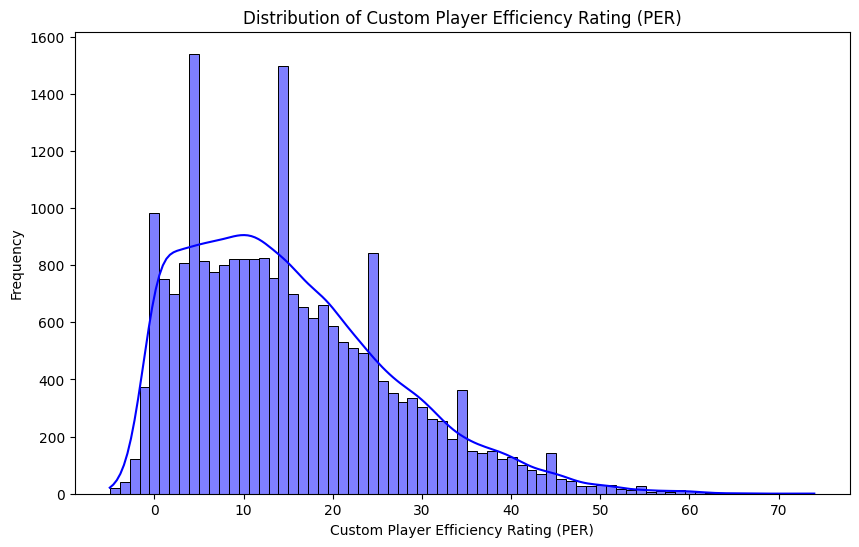

In [22]:
# Custom PER calculation
player_data['custom_PER'] = (player_data['PTS'] + player_data['REB'] + player_data['AST'] + 
                             player_data['STL'] + player_data['BLK']) - \
                             (player_data['TOV'] + player_data['PF'])

plt.figure(figsize=(10,6))
sns.histplot(player_data['custom_PER'], kde=True, color='blue')
plt.title('Distribution of Custom Player Efficiency Rating (PER)')
plt.xlabel('Custom Player Efficiency Rating (PER)')
plt.ylabel('Frequency')
plt.show()


## Box plot of points scored (PTS) by each team

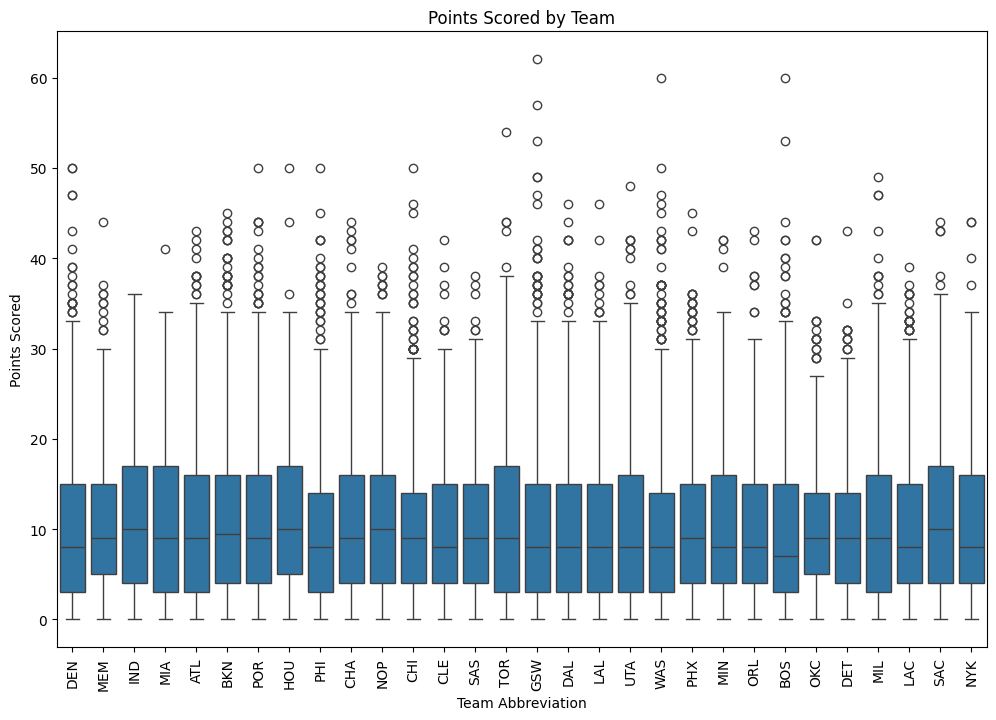

In [22]:
# Box plot of points scored (PTS) by each team
plt.figure(figsize=(12,8))
sns.boxplot(x='TEAM_ABBREVIATION', y='PTS', data=player_data)
plt.title('Points Scored by Team')
plt.xlabel('Team Abbreviation')
plt.ylabel('Points Scored')
plt.xticks(rotation=90)
plt.show()


# Model 1: Predicting Player Performance Based on Team Success
- **Goal**: Predict the performance of players (PTS, AST, REB) based on team success and player characteristics.
- **Independent Variables**: Team performance metrics (e.g., W_PCT, TEAM_ABBREVIATION), player usage rate (USG%), and previous game performance.
- **Dependent Variable**: Player's Points, Assists, or Rebounds.
- **Model Type**: Linear Regression or Random Forest Regressor.
- **Why**: Understanding how team dynamics and player roles affect individual performance could guide future recruitment strategies.


# Part 4: Proposed Model

## Proposed Model
We propose to use a **linear regression model** to predict player scoring performance based on key statistical indicators such as **assists (AST)**, **rebounds (REB)**, **field goal percentage (FG%)**, and **true shooting percentage (TS%)**. This will highlight how different variables contribute to scoring patterns.

### Approach:
1. Features:
   - Assists
   - Rebounds
   - True Shooting Percentage
   - Player Efficiency Rating
2. Target Variable:
   - Points per game (PTS)
3. Model:
   - Linear Regression Model to estimate correlation.


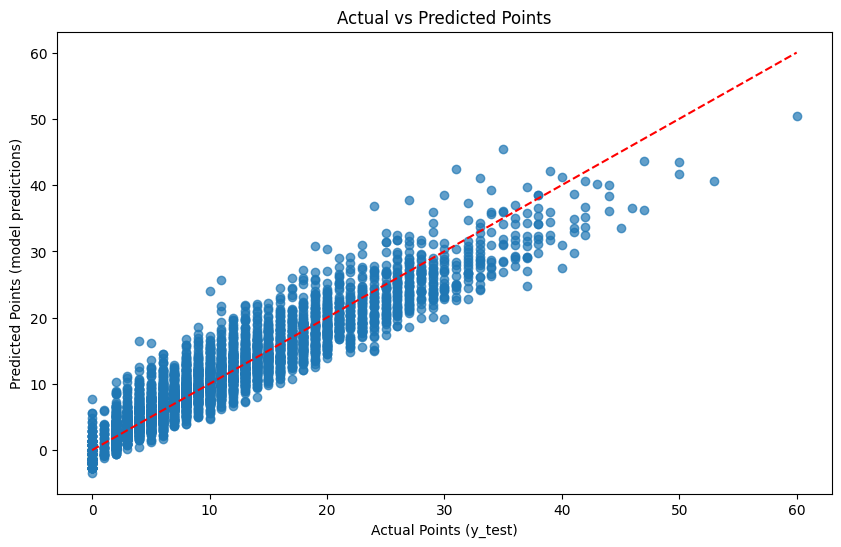

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

file_path = 'data/player_gamelogs_2021.csv'

# Compute True Shooting Percentage (TS%)
data['TS%'] = data['PTS'] / (2 * (data['FGA'] + 0.44 * data['FTA']))

# Placeholder computation for PER (Player Efficiency Rating)  
data['PER'] = data['PTS'] + data['AST'] + data['REB'] - data['TOV']

# Features and target
features = ['TS%', 'PER']
target = 'PTS'

# Ensure no null values exist in our computed features or target
model_data = data.dropna(subset=features + [target])

# Extract features and target
X = model_data[features]
y = model_data[target]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7) 
plt.xlabel("Actual Points (y_test)")
plt.ylabel("Predicted Points (model predictions)")
plt.title("Actual vs Predicted Points")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal fit line
plt.show()

### Linear Regression Model Explanation

#### 1. **Objective**
The goal of this analysis is to predict a player's points (`PTS`) using two key performance statistics:
- **True Shooting Percentage (TS%)**: A measure of scoring efficiency based on field goal attempts and free throws.
- **Player Efficiency Rating (PER)**: A metric representing a player's overall contribution to the game.

#### 2. **Features Used**
The following features were used as input to the model:
- **TS% (True Shooting Percentage)**: Calculated as `PTS / (2 * (FGA + 0.44 * FTA))`. It measures scoring efficiency by considering field goals and free throws.
- **PER (Player Efficiency Rating)**: Estimated as `PTS + AST + REB - TOV`. This aggregates a player's efficiency metrics, including points, assists, rebounds, and turnovers.

#### 3. **Model Used**
We implemented a **Linear Regression Model**, which establishes a relationship between input features (`TS%`, `PER`) and the target variable (`PTS`). This model assumes a linear relationship between these features and the target variable.

The model was implemented using the scikit-learn library and trained on a subset of the data split into training and testing sets.

#### 4. **Training & Testing Data**
The data was split into training and testing subsets using an 80/20 split. The model was trained on the training data and validated on the testing set to ensure it generalizes well to unseen data.

#### 5. **Model Results**
The model's predictions were compared against actual points from the test data. The scatter plot below illustrates this comparison:

#### 6. **Model Visualization**
The scatter plot compares **actual points** (on the x-axis) against the **predicted points** (on the y-axis). The red dashed line represents the ideal prediction line (`y = x`). Points close to this line indicate accurate predictions.

The closer a player's data points are to this line, the better the model predicts their performance.

#### 7. **Insights**
- If the points are closely clustered around the red line, the model has good predictive accuracy.
- Any deviations from this line could indicate edge cases, anomalies, or additional factors influencing scoring not captured by the two input features.


# Conclusion


After performing exploratory analysis and applying our proposed model, the following conclusions can be drawn:

1. **Scoring Trends**:
   Key statistics like assists and true shooting percentage have a strong correlation with scoring ability. Top-performing NBA players in scoring typically rely on efficient shooting and high usage rates.

2. **Player Efficiency Insights**:
   Analysis of PER suggests a strong connection between overall efficiency and scoring performance metrics.

3. **Model Implications**:
   The linear regression model provides insights into which statistics most strongly influence a player's scoring ability.

The analysis of the 2021 NBA season highlights the dynamic factors influencing player performance, scoring ability, and efficiency. Top scorers like **Stephen Curry**, **Damian Lillard**, and **Joel Embiid** demonstrated how volume shooting and consistency are vital for elite scoring, with Curry leading the league with an average of **31.98 points per game**.

Furthermore, **Player Efficiency Rating (PER)** demonstrated that players such as **Nikola Jokic** and **Giannis Antetokounmpo** provided well-rounded contributions in scoring, rebounding, and playmaking, emphasizing versatility as a valuable performance trait.

The insights from **True Shooting Percentage (TS%)** and correlations with **PER** provide deeper context into player performance patterns, illustrating that efficient shooting and strategic usage rates are critical to success.

These findings underscore the importance of advanced statistical analysis for teams aiming to scout talent, evaluate player performance, and make informed strategic decisions. By leveraging metrics like PER, TS%, and usage rates, teams can identify not only elite scoring talents but also versatile contributors who provide value across multiple areas of the game.

The findings from this analysis will prove valuable for teams seeking to optimize their player strategies and roster building while informing player development programs and performance evaluations for years to come.

Future improvements could involve more advanced modeling methods like Random Forests or Neural Networks to uncover nonlinear relationships in the data.